In [2]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

pd.options.mode.chained_assignment = None

In [3]:
male_df = pd.read_csv('male_cleaned.csv')
female_df = pd.read_csv('female_cleaned.csv')

In [4]:
gender = 'male'
weight = int(790)
length = int(1740)

In [5]:
## MALE

In [6]:
tshirt_size = []
tshirt_color = []

for chest, waist in zip(male_df['chestcircumference'], male_df['waistcircumference']):
    if chest < 965:
        if waist >= 860:
            tshirt_size.append('Medium')
            tshirt_color.append('Orange')
        else:
            tshirt_size.append('Small')
            tshirt_color.append('Yellow')
    elif chest < 1040:
        if waist >= 915:
             tshirt_size.append('Large')
             tshirt_color.append('Red')
        else:
            tshirt_size.append('Medium')
            tshirt_color.append('Orange')
    elif chest < 1120:
        if waist >= 965:
            tshirt_size.append('X-Large')
            tshirt_color.append('Pink')
        else:
            tshirt_size.append('Large')
            tshirt_color.append('Red')
    elif chest < 1195:
        if waist >= 1015:
            tshirt_size.append('XX-Large')
            tshirt_color.append('Purple')
        else:
            tshirt_size.append('X-Large')
            tshirt_color.append('Pink')
    elif chest < 1270:
        tshirt_size.append('XX-Large')
        tshirt_color.append('Blue')
    elif chest < 1345:
        tshirt_size.append('XXX-Large')
        tshirt_color.append('Brown')
    elif chest < 1500:
        tshirt_size.append('XXXX-Large')
        tshirt_color.append('Green')

male_df['tshirt_size'] = tshirt_size
male_df['tshirt_color'] = tshirt_color

In [7]:
pants_size = []
pants_color = []

for crotch, waist in zip(male_df['crotchheight'], male_df['waistcircumference']):
    if crotch < 810:
        if waist > 760:
            pants_size.append('Small')
            pants_color.append('Yellow')
        else:
            pants_size.append('X-Small')
            pants_color.append('Lightgreen')
    elif crotch < 820:
        if waist > 840:
            pants_size.append('Medium')
            pants_color.append('Orange')
        else:
            pants_size.append('Small')
            pants_color.append('Yellow')
    elif crotch < 830:
        if waist > 920:
            pants_size.append('Large')
            pants_color.append('Red')
        else:
            pants_size.append('Medium')
            pants_color.append('Orange')
    elif crotch < 850:
        if waist > 1000:
            pants_size.append('X-Large')
            pants_color.append('Mediumvioletred')
        else:
            pants_size.append('Large')
            pants_color.append('Red')
    elif crotch < 860:
        if waist > 1080:
            pants_size.append('XX-Large')
            pants_color.append('Indigo')
        else:
            pants_size.append('X-Large')
            pants_color.append('Mediumvioletred')
    elif crotch < 870:
        pants_size.append('XX-Large')
        pants_color.append('Indigo')
    elif crotch < 880:
        pants_size.append('XXX-Large')
        pants_color.append('Brown')
    elif crotch >= 880:
        pants_size.append('XXXX-Large')
        pants_color.append('Indianred')

male_df['pants_size'] = pants_size
male_df['pants_color'] = pants_color

In [8]:
## FEMALE

In [9]:
tshirt_size = []
tshirt_color = []

for chest, waist in zip(female_df['chestcircumference'], female_df['waistcircumference']):
    if chest < 965:
        if waist >= 860:
            tshirt_size.append('Medium')
            tshirt_color.append('Orange')
        else:
            tshirt_size.append('Small')
            tshirt_color.append('Yellow')
    elif chest < 1040:
        if waist >= 915:
             tshirt_size.append('Large')
             tshirt_color.append('Red')
        else:
            tshirt_size.append('Medium')
            tshirt_color.append('Orange')
    elif chest < 1120:
        if waist >= 965:
            tshirt_size.append('X-Large')
            tshirt_color.append('Pink')
        else:
            tshirt_size.append('Large')
            tshirt_color.append('Red')
    elif chest < 1195:
        if waist >= 1015:
            tshirt_size.append('XX-Large')
            tshirt_color.append('Purple')
        else:
            tshirt_size.append('X-Large')
            tshirt_color.append('Pink')
    elif chest < 1270:
        tshirt_size.append('XX-Large')
        tshirt_color.append('Blue')
    elif chest < 1345:
        tshirt_size.append('XXX-Large')
        tshirt_color.append('Brown')
    elif chest < 1500:
        tshirt_size.append('XXXX-Large')
        tshirt_color.append('Green')

female_df['tshirt_size'] = tshirt_size
female_df['tshirt_color'] = tshirt_color

In [10]:
closest = []

for data_length, data_weight in zip(male_df['stature'], male_df['weightkg']):
    delta_y = abs(length) - abs(data_length)
    delta_x = abs(weight) - abs(data_weight)
    hypo = delta_y ** 2 + delta_x ** 2
    closest.append(math.sqrt(hypo))

male_df['closest'] = closest
K = male_df.sort_values(by=['closest']).head(10)
print(f'T-shirt size:', K['tshirt_size'].value_counts().idxmax())
print(f'T-shirt color:', K['tshirt_color'].value_counts().idxmax())

T-shirt size: Medium
T-shirt color: Orange


<AxesSubplot:xlabel='weightkg', ylabel='stature'>

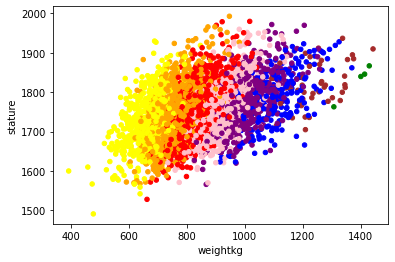

In [11]:
male_df.plot(kind='scatter', x='weightkg', y='stature', c='tshirt_color')

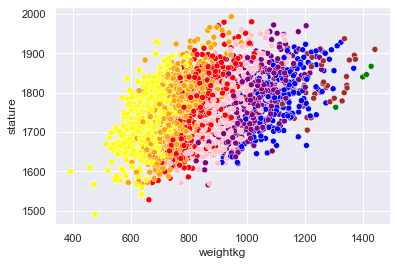

In [12]:
sns.set()
sns.scatterplot(y=male_df['stature'], x=male_df['weightkg'], c=male_df['tshirt_color'])
plt.show()

In [13]:
my_length = 1730
my_weight = 790

In [14]:
x = np.array(list(zip(male_df['stature'], male_df['weightkg'])))
y = np.array(male_df['tshirt_size'])
x.reshape(1, -1)

array([[1776,  815, 1702, ...,  731, 1828,  985]])

In [15]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(x, y)

predicted=knn.predict([[my_length,my_weight]])
print(predicted)

['Medium']


In [16]:
male_df['Gender'].value_counts().idxmax()

'Male'

In [17]:
male_df.head()

,stature,weightkg,chestcircumference,waistcircumference,pants_size,pants_color,tshirt_color,tshirt_size,crotchheight,buttockcircumference,Gender,closest
0,1776,815,1074,933,XXX-Large,Brown,Red,Large,877,979,Male,43.829214
1,1702,726,1021,870,X-Large,Mediumvioletred,Orange,Medium,851,944,Male,74.431176
2,1735,929,1120,964,X-Large,Mediumvioletred,Pink,X-Large,854,1054,Male,139.089899
3,1655,794,1114,857,Small,Yellow,Red,Large,769,991,Male,85.094066
4,1914,946,1048,868,XXXX-Large,Indianred,Red,Large,1014,1029,Male,233.692105


In [18]:
dec_x = male_df.drop('tshirt_size', axis=1).copy()

In [19]:
dec_x.head()

,stature,weightkg,chestcircumference,waistcircumference,pants_size,pants_color,tshirt_color,crotchheight,buttockcircumference,Gender,closest
0,1776,815,1074,933,XXX-Large,Brown,Red,877,979,Male,43.829214
1,1702,726,1021,870,X-Large,Mediumvioletred,Orange,851,944,Male,74.431176
2,1735,929,1120,964,X-Large,Mediumvioletred,Pink,854,1054,Male,139.089899
3,1655,794,1114,857,Small,Yellow,Red,769,991,Male,85.094066
4,1914,946,1048,868,XXXX-Large,Indianred,Red,1014,1029,Male,233.692105


In [20]:
dec_y = male_df.tshirt_size.copy()

In [21]:
dec_y.head()

0      Large
1     Medium
2    X-Large
3      Large
4      Large
Name: tshirt_size, dtype: object

In [22]:
dec_x.tshirt_color.unique()

array(['Red', 'Orange', 'Pink', 'Blue', 'Purple', 'Yellow', 'Green',
       'Brown'], dtype=object)

In [23]:
pd.get_dummies(dec_x, columns=['weightkg']).head()

,stature,chestcircumference,waistcircumference,pants_size,pants_color,tshirt_color,crotchheight,buttockcircumference,Gender,closest,...,weightkg_1345,weightkg_1346,weightkg_1354,weightkg_1369,weightkg_1371,weightkg_1375,weightkg_1400,weightkg_1413,weightkg_1429,weightkg_1442
0,1776,1074,933,XXX-Large,Brown,Red,877,979,Male,43.829214,...,0,0,0,0,0,0,0,0,0,0
1,1702,1021,870,X-Large,Mediumvioletred,Orange,851,944,Male,74.431176,...,0,0,0,0,0,0,0,0,0,0
2,1735,1120,964,X-Large,Mediumvioletred,Pink,854,1054,Male,139.089899,...,0,0,0,0,0,0,0,0,0,0
3,1655,1114,857,Small,Yellow,Red,769,991,Male,85.094066,...,0,0,0,0,0,0,0,0,0,0
4,1914,1048,868,XXXX-Large,Indianred,Red,1014,1029,Male,233.692105,...,0,0,0,0,0,0,0,0,0,0


In [24]:
dec_y_df = pd.DataFrame(dec_y)

In [25]:
ts_size = []
for size in dec_y_df['tshirt_size']:
    if size == 'Small':
        ts_size.append(1)
    elif size == 'Medium':
        ts_size.append(2)
    elif size == 'Large':
        ts_size.append(3)
    elif size == 'X-Large':
        ts_size.append(4)
    elif size == 'XX-Large':
        ts_size.append(5)
    elif size == 'XXX-Large':
        ts_size.append(6)
    elif size == 'XXXX-Large':
        ts_size.append(7)

dec_y_df['tshirt_size'] = ts_size
dec_y_df.head(10)

,tshirt_size
0,3
1,2
2,4
3,3
4,3
5,3
6,5
7,4
8,5
9,1


In [26]:
dec_x_encoded = pd.get_dummies(dec_x, columns=['weightkg', 'stature'])

In [27]:
dec_x_encoded = dec_x_encoded.drop(columns=['pants_size', 'pants_color', 'tshirt_color', 'Gender', 'chestcircumference', 'waistcircumference', 'crotchheight', 'buttockcircumference', 'closest'], axis=1)

In [28]:
from sklearn.tree import DecisionTreeClassifier
dec_x_train, dec_x_test, dec_y_train, dec_y_test = train_test_split(dec_x_encoded, dec_y_df, random_state=42, test_size=0.33)
clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt = clf_dt.fit(dec_x_train, dec_y_train)

In [29]:
dec_y_df.head()

,tshirt_size
0,3
1,2
2,4
3,3
4,3


In [30]:
dec_x_encoded.head()

,weightkg_393,weightkg_459,weightkg_474,weightkg_478,weightkg_516,weightkg_523,weightkg_529,weightkg_533,weightkg_535,weightkg_540,...,stature_1955,stature_1958,stature_1959,stature_1960,stature_1966,stature_1970,stature_1972,stature_1979,stature_1980,stature_1993
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
# from sklearn.tree import plot_tree
#
# plt.figure(figsize=(35, 25))
# plot_tree(clf_dt,
#           filled=True,
#           rounded=True,
#           class_names=['S', 'M', 'L', 'XL', 'XXL', 'XXXL', 'XXXXL'],
#           feature_names=dec_x_encoded.columns)

c:\users\jon\git\projektarbete_bigdata_jon2\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


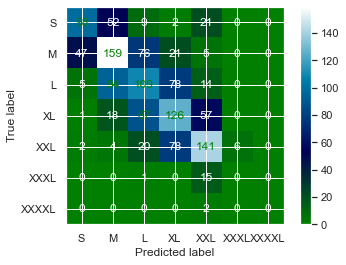

In [32]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf_dt, dec_x_test, dec_y_test, display_labels=['S', 'M', 'L', 'XL', 'XXL', 'XXXL', 'XXXXL'], cmap='ocean')

In [33]:
LR_x = np.array(list(zip(male_df['stature'], male_df['weightkg'])))
LR_y = np.array(dec_y_df['tshirt_size'])

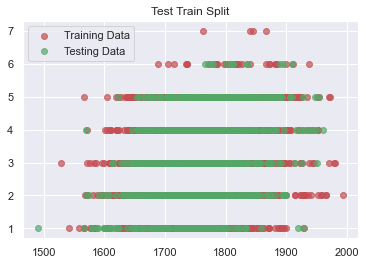

In [34]:
lr_x_train, lr_x_test, lr_y_train, lr_y_test = train_test_split(LR_x, LR_y)

plt.scatter(lr_x_train[:,0], lr_y_train, label='Training Data', color='r', alpha=.7)
plt.scatter(lr_x_test[:,0], lr_y_test, label='Testing Data', color='g', alpha=.7)
plt.legend()
plt.title("Test Train Split")
plt.show()

In [35]:
LR = LinearRegression()
LR.fit(lr_x_train, lr_y_train)

LinearRegression()

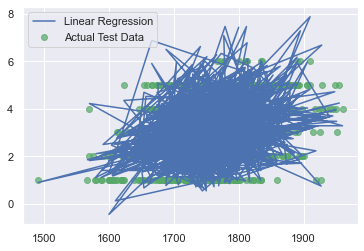

In [36]:
prediction = LR.predict(lr_x_test)

plt.plot(lr_x_test[:,0], prediction, label='Linear Regression', color='b')
plt.scatter(lr_x_test[:,0], lr_y_test, label='Actual Test Data', color='g', alpha=.7)
plt.legend()
plt.show()

In [37]:
X = np.array(list(zip(male_df['stature'], male_df['weightkg'])))
y_ts = np.array(male_df['tshirt_size'])
y_ps = np.array(male_df['pants_size'])
X.reshape(1, -1)

array([[1776,  815, 1702, ...,  731, 1828,  985]])

In [49]:
X_ts_train, X_ts_test, y_ts_train, y_ts_test = train_test_split(X, y_ts, random_state=42, test_size=0.33)
X_ps_train, X_ps_test, y_ps_train, y_ps_test = train_test_split(X, y_ps, random_state=42, test_size=0.33)

clf_dt_pruned_ts = DecisionTreeClassifier(random_state=42, ccp_alpha=0.0033)
clf_dt_pruned_ts = clf_dt_pruned_ts.fit(X_ts_train, y_ts_train)

clf_dt_pruned_ps = DecisionTreeClassifier(random_state=42, ccp_alpha=0.0021)
clf_dt_pruned_ps = clf_dt_pruned_ps.fit(X_ps_train, y_ps_train)

print(clf_dt_pruned_ts.predict([[length, weight]]))
print(clf_dt_pruned_ps.predict([[length, weight]]))
score_ts = clf_dt_pruned_ts.score(X_ts_test, y_ts_test)*100
score_ps = clf_dt_pruned_ps.score(X_ps_test, y_ps_test)*100
print(score_ts)
print(score_ps)

['Large']
['Large']
63.798219584569736
50.66765578635015
